# <div style="text-align: right"> FIT1043 Introduction to Data Science </div> <div style="text-align: right"> Assignment 2 </div>
<div style="text-align: right"> Name : Ooi Yu Zhang </div> <div style="text-align: right"> Student ID : 32713339 </div> <div style="text-align: right"> 25<sup>th</sup> April 2022 </div>
_______________________________________________________________________________________________________________________________


# Introduction  


In this assignment, I will be predictive analysis on a dataset that consists of essays with a lot of varying attributes.</br>
My approach will be to do research on different techniques and attempting to create the best model I am able to.</br>
References will also be provided at the end of the assignment.
_______________________________________________________________________________________________________________________________

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, cohen_kappa_score
from IPython.display import display, Markdown, Latex

_______________________________________________________________________________________________________________________________

## Reading The Files

In [2]:
dataset = pd.read_csv('FIT1043-Essay-Features.csv')

_______________________________________________________________________________________________________________________________

## Reading The Data

### Reading data from FIT1043 Essay Features

#### Displaying the data

In [3]:
dataset

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,1151,2404,467,16,10,0,5.147752,22,0,21.227273,462.987069,0.991407,200,0.428266,113,0.241970,529,519,4
1328,1015,1182,241,0,14,0,4.904564,16,0,15.062500,238.655462,0.990272,94,0.390041,67,0.278008,293,283,3
1329,1345,1814,363,5,11,0,4.997245,13,3,27.923077,362.329640,0.998153,170,0.468320,107,0.294766,427,415,3
1330,344,1427,287,5,8,0,4.972125,13,1,22.076923,284.657277,0.991837,144,0.501742,83,0.289199,323,312,3


In [4]:
dataset.head()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4


#### Checking the dimensions of the data

In [5]:
dataset.shape

(1332, 19)

#### Checking how the column headers are stored

In [6]:
dataset.columns

Index(['essayid', 'chars', 'words', 'commas', 'apostrophes', 'punctuations',
       'avg_word_length', 'sentences', 'questions', 'avg_word_sentence', 'POS',
       'POS/total_words', 'prompt_words', 'prompt_words/total_words',
       'synonym_words', 'synonym_words/total_words', 'unstemmed', 'stemmed',
       'score'],
      dtype='object')

#### Displaying more detailed parts of the data

In [7]:
dataset.info

<bound method DataFrame.info of       essayid  chars  words  commas  apostrophes  punctuations  \
0        1457   2153    426      14            6             0   
1         503   1480    292       9            7             0   
2         253   3964    849      19           26             1   
3         107    988    210       8            7             0   
4        1450   3139    600      13            8             0   
...       ...    ...    ...     ...          ...           ...   
1327     1151   2404    467      16           10             0   
1328     1015   1182    241       0           14             0   
1329     1345   1814    363       5           11             0   
1330      344   1427    287       5            8             0   
1331     1077   2806    542      24            6             0   

      avg_word_length  sentences  questions  avg_word_sentence         POS  \
0            5.053991         16          0          26.625000  423.995272   
1            5.0684

In [8]:
dataset.describe()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
count,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000
mean,905.27027,2101.745495,424.485736,14.667417,8.141141,0.47973,4.939762,19.704204,1.222973,23.884687,420.596542,0.989935,198.913664,0.469164,110.16967,0.263846,468.987988,455.507508,3.427177
std,526.68760,865.963750,171.873730,10.920781,6.124520,1.27168,0.231071,19.202731,1.847446,11.160020,170.985111,0.007308,82.729266,0.052466,43.96192,0.038870,159.447449,155.751220,0.774275
min,0.00000,169.000000,36.000000,0.000000,2.000000,0.00000,2.231322,0.000000,0.000000,1.084112,35.647059,0.924771,14.000000,0.288889,11.00000,0.027299,48.000000,50.000000,1.000000
25%,442.75000,1527.250000,310.000000,7.000000,4.000000,0.00000,4.791679,13.000000,0.000000,19.142857,305.406284,0.987758,144.000000,0.435709,81.00000,0.238423,361.000000,350.750000,3.000000
50%,914.50000,2029.500000,411.000000,13.000000,6.000000,0.00000,4.946059,18.000000,1.000000,22.030331,406.982869,0.991572,193.000000,0.465852,107.50000,0.262872,463.000000,448.000000,3.000000
75%,1369.75000,2613.500000,525.000000,21.000000,11.000000,0.00000,5.092938,24.000000,2.000000,26.048234,520.739458,0.994425,246.000000,0.500000,134.00000,0.288277,581.000000,561.250000,4.000000
max,1799.00000,6142.000000,1170.000000,72.000000,51.000000,26.00000,5.681429,642.000000,17.000000,303.000000,1158.984563,1.000000,669.000000,0.961207,355.00000,0.465517,750.000000,750.000000,6.000000


## Describing The Data



### Measures of Central Tendency (Mean and Median)
_______________________________________________________________________________________________________________________________

#### Essay ID

In [9]:
dataset['essayid'].mean()

905.2702702702703

In [10]:
dataset['essayid'].median()

914.5

#### Characters

In [11]:
dataset['chars'].mean()

2101.7454954954956

In [12]:
dataset['chars'].median()

2029.5

#### Words

In [13]:
dataset['words'].mean()

424.4857357357357

In [14]:
dataset['words'].median()

411.0

#### Commas

In [15]:
dataset['commas'].mean()

14.667417417417417

In [16]:
dataset['commas'].median()

13.0

#### Apostrophes

In [17]:
dataset['apostrophes'].mean()

8.14114114114114

In [18]:
dataset['apostrophes'].median()

6.0

#### Punctuations

In [19]:
dataset['punctuations'].mean()

0.4797297297297297

In [20]:
dataset['punctuations'].median()

0.0

#### Average Word Length

In [21]:
dataset['avg_word_length'].mean()

4.939762160950457

In [22]:
dataset['avg_word_length'].median()

4.946059456

#### Sentences

In [23]:
dataset['sentences'].mean()

19.704204204204203

In [24]:
dataset['sentences'].median()

18.0

#### Questions

In [25]:
dataset['questions'].mean()

1.222972972972973

In [26]:
dataset['questions'].median()

1.0

#### Average Words Per Sentence

In [27]:
dataset['avg_word_sentence'].mean()

23.884686874754497

In [28]:
dataset['avg_word_sentence'].median()

22.03033088

#### Part-Of-Speech

In [29]:
dataset['POS'].mean()

420.596541695675

In [30]:
dataset['POS'].median()

406.9828691

#### Ratio of Part-Of-Speech to Total Number Of Words

In [31]:
dataset['POS/total_words'].mean()

0.9899351385195204

In [32]:
dataset['POS/total_words'].median()

0.9915724335

#### Prompt Words

In [33]:
dataset['prompt_words'].mean()

198.91366366366367

In [34]:
dataset['prompt_words'].median()

193.0

#### Ratio of Prompt Words to Total Number Of Words

In [35]:
dataset['prompt_words/total_words'].mean()

0.4691638682162157

In [36]:
dataset['prompt_words/total_words'].median()

0.465851523

#### Synonym Words

In [37]:
dataset['synonym_words'].mean()

110.16966966966967

In [38]:
dataset['synonym_words'].median()

107.5

#### Ratio of Synonym Words to Total Number Of Words

In [39]:
dataset['synonym_words/total_words'].mean()

0.2638456025600604

In [40]:
dataset['synonym_words/total_words'].median()

0.26287187050000005

#### Unstemmed Words

In [41]:
dataset['unstemmed'].mean()

468.987987987988

In [42]:
dataset['unstemmed'].median()

463.0

#### Stemmed Words

In [43]:
dataset['stemmed'].mean()

455.5075075075075

In [44]:
dataset['stemmed'].median()

448.0

#### Score

In [45]:
dataset['score'].mean()

3.4271771771771773

In [46]:
dataset['score'].median()

3.0

### Measures of Variability (Range and Variance)
_______________________________________________________________________________________________________________________________

#### Essay ID

In [47]:
dataset['essayid'].max() - dataset['essayid'].min()

1799

In [48]:
dataset['essayid'].var()

277399.8277255469

#### Characters

In [49]:
dataset['chars'].max() - dataset['chars'].min()

5973

In [50]:
dataset['chars'].var()

749893.2161705282

#### Words

In [51]:
dataset['words'].max() - dataset['words'].min()

1134

In [52]:
dataset['words'].var()

29540.57906008939

#### Commas

In [53]:
dataset['commas'].max() - dataset['commas'].min()

72

In [54]:
dataset['commas'].var()

119.26346049279931

#### Apostrophes

In [55]:
dataset['apostrophes'].max() - dataset['apostrophes'].min()

49

In [56]:
dataset['apostrophes'].var()

37.50974114610453

#### Punctuations

In [57]:
dataset['punctuations'].max() - dataset['punctuations'].min()

26

In [58]:
dataset['punctuations'].var()

1.6171695737811695

#### Average Word Length

In [59]:
dataset['avg_word_length'].max() - dataset['avg_word_length'].min()

3.4501067320000005

In [60]:
dataset['avg_word_length'].var()

0.05339401973194578

#### Sentences

In [61]:
dataset['sentences'].max() - dataset['sentences'].min()

642

In [62]:
dataset['sentences'].var()

368.74489591018533

#### Questions

In [63]:
dataset['questions'].max() - dataset['questions'].min()

17

In [64]:
dataset['questions'].var()

3.4130556176010507

#### Average Words Per Sentence

In [65]:
dataset['avg_word_sentence'].max() - dataset['avg_word_sentence'].min()

301.91588785

In [66]:
dataset['avg_word_sentence'].var()

124.54604743033157

#### Part-Of-Speech

In [67]:
dataset['POS'].max() - dataset['POS'].min()

1123.33750418

In [68]:
dataset['POS'].var()

29235.908018788636

#### Ratio of Part-Of-Speech to Total Number Of Words

In [69]:
dataset['POS/total_words'].max() - dataset['POS/total_words'].min()

0.07522861199999997

In [70]:
dataset['POS/total_words'].var()

5.3412047135317936e-05

#### Prompt Words

In [71]:
dataset['prompt_words'].max() - dataset['prompt_words'].min()

655

In [72]:
dataset['prompt_words'].var()

6844.131533674911

#### Ratio of Prompt Words to Total Number Of Words

In [73]:
dataset['prompt_words/total_words'].max() - dataset['prompt_words/total_words'].min()

0.672318008

In [74]:
dataset['prompt_words/total_words'].var()

0.0027526862975129464

#### Synonym Words

In [75]:
dataset['synonym_words'].max() - dataset['synonym_words'].min()

344

In [76]:
dataset['synonym_words'].var()

1932.6503791545117

#### Ratio of Synonym Words to Total Number Of Words

In [77]:
dataset['synonym_words/total_words'].max() - dataset['synonym_words/total_words'].min()

0.43821839

In [78]:
dataset['synonym_words/total_words'].var()

0.0015109093517610816

#### Unstemmed Words

In [79]:
dataset['unstemmed'].max() - dataset['unstemmed'].min()

702

In [80]:
dataset['unstemmed'].var()

25423.48896153852

#### Stemmed Words

In [81]:
dataset['stemmed'].max() - dataset['stemmed'].min()

700

In [82]:
dataset['stemmed'].var()

24258.44246801268

#### Score

In [83]:
dataset['score'].max() - dataset['score'].min()

5

In [84]:
dataset['score'].var()

0.5995012668566343

# Supervised Learning
_______________________________________________________________________________________________________________________________

### What is Supervised Learning?

Supervised Learning which is also known as Supervised Machine Learning, is a subcategory of machine learning and artificial intelligence. Through the cross</br>-validation process, which is a technique where an untrained sample of the provided dataset is used to assess the machine learning model's performance, all the input data that is fed into the model will contribute towards 
the approximation of the desired output. **[1] [2]** 

### What is the notion of labeled data?

Labeled data is essentially data that have been labeled to be made identifiable according to specific properties, characteristics or classifications. In terms of supervised machine learning, labeled data acts as the starting point for training and testing machine learning models. It is used by models to perform analysis and comparisons betweem them to determine the nature of the data and sort them into their own individual categories. The result of this operation will be useful in the predictive analysis of unlabeled data wherein we will be able to predict the labels for these unlabeled data or in other words be able to categorize them. **[3]**

### What are the purpose of training and test datasets?

The training and test datasets make up the one dataset in which they have been split into training and test datasets individually with different ratios for different purposes. It is very important that the training and test datasets are derived from the same dataset and that the test dataset is large enough to ensure that the results of the machine learning process are justifiable. In terms of the purpose of the datasets, the training dataset will be used to train the model while the test dataset will be used to test the trained model. Most importantly, the test dataset should never be used to train the model as this will result in a very high accuracy when the test dataset is tested using this kind of model, this scenario would be considered as overfitting. **[4]**

### Splitting of Features and Labels

#### Explanation for choice of features and labels:
After looking at the dataset, it can be easily concluded that the labels would be the scores which we will be attempting to perform predicitive analysis on, and the features would be the rest of the data in the dataset. However, it can be seen that the the amount of data for the features is quite bloated, hence I will be trimming it down later on.

#### Obtaining the features (All data besides score)

In [85]:
data_features = dataset.iloc[:,:-1].values

In [86]:
data_features

array([[1.45700000e+03, 2.15300000e+03, 4.26000000e+02, ...,
        2.46478873e-01, 4.24000000e+02, 4.12000000e+02],
       [5.03000000e+02, 1.48000000e+03, 2.92000000e+02, ...,
        2.63698630e-01, 3.56000000e+02, 3.45000000e+02],
       [2.53000000e+02, 3.96400000e+03, 8.49000000e+02, ...,
        1.53121319e-01, 7.50000000e+02, 7.50000000e+02],
       ...,
       [1.34500000e+03, 1.81400000e+03, 3.63000000e+02, ...,
        2.94765840e-01, 4.27000000e+02, 4.15000000e+02],
       [3.44000000e+02, 1.42700000e+03, 2.87000000e+02, ...,
        2.89198606e-01, 3.23000000e+02, 3.12000000e+02],
       [1.07700000e+03, 2.80600000e+03, 5.42000000e+02, ...,
        2.85977860e-01, 5.96000000e+02, 5.75000000e+02]])

#### Obtaining the labels (Score)

In [87]:
data_labels = dataset.iloc[:,-1].values

In [88]:
data_labels

array([4, 4, 4, ..., 3, 3, 4], dtype=int64)

### Trimming down the Features (Using Feature Selection Methods)
_______________________________________________________________________________________________________________________________

### Recursive Feature Elimination (RFE)
Recursive Feature Elimination essentially selects features by recursively considering smaller and smaller sets of features. It selects features based on the importance of the feature with regards to the predicting the output of the model. It eliminates features that are of less importance and selects the top features indicated. Along with RFE, I will also be using the Logistic Regression Algorithm which is a linear model for classification despite its name. In this model, a logistic function is used to model the probabilities describing the possible outcomes of a single trial, which in our case will be the features. **[5] [6] [7]**

#### Explanation: Here I will be using Recursive Feature Elimination (RFE) to identify the top 9 features which is approximately half the features that contribute the most to predicting the Score. These 9 features will be used to train the model.


In [89]:
#the 'lbfgs' solver is used here as it is the most robust solver
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, n_features_to_select=9)
fit = rfe.fit(data_features, data_labels)
d = {'Feature':dataset.columns[:-1], 'Contribution': fit.support_, 'Ranking': fit.ranking_}
df = pd.DataFrame(data=d)
df

C:\Users\andre\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\andre\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

,Feature,Contribution,Ranking
0,essayid,False,4
1,chars,True,1
2,words,True,1
3,commas,True,1
4,apostrophes,False,5
5,punctuations,False,8
6,avg_word_length,False,3
7,sentences,False,2
8,questions,False,6
9,avg_word_sentence,True,1


#### Result: The 9 features selected that will be used for training the model are 'chars', 'words', 'commas', avg_word_sentence', 'POS', 'prompt_words', 'synonym_words', 'unstemmed' and 'stemmed'.


### Selecting The Features
_______________________________________________________________________________________________________________________________

In [90]:
table = df[df['Ranking'] == 1]
table

,Feature,Contribution,Ranking
1,chars,True,1
2,words,True,1
3,commas,True,1
9,avg_word_sentence,True,1
10,POS,True,1
12,prompt_words,True,1
14,synonym_words,True,1
16,unstemmed,True,1
17,stemmed,True,1


In [91]:
sel_feat = ['chars', 'words', 'commas','avg_word_sentence', 'POS', 'prompt_words', 'synonym_words', 'unstemmed', 'stemmed']
new_features = dataset[sel_feat].values
new_features

array([[2153.,  426.,   14., ...,  105.,  424.,  412.],
       [1480.,  292.,    9., ...,   77.,  356.,  345.],
       [3964.,  849.,   19., ...,  130.,  750.,  750.],
       ...,
       [1814.,  363.,    5., ...,  107.,  427.,  415.],
       [1427.,  287.,    5., ...,   83.,  323.,  312.],
       [2806.,  542.,   24., ...,  155.,  596.,  575.]])

## Splitting the Training and Test Dataset
_______________________________________________________________________________________________________________________________

### Here the dataset will be split into training and test datasets using the sklearn.model_selection.train_test_split function. </br>
### As a reminder for later on:</br> <span style="color:red">*train_feat = Training dataset for Features*</span></br><span style="color:orange">*test_feat = Test dataset for Features*</span></br><span style="color:blue">*train_label = Training dataset for Labels*</span></br><span style="color:green">*test_label = Test dataset for Labels*</span>

In [92]:
train_feat, test_feat, train_label, test_label = train_test_split(new_features, data_labels, test_size=0.25, random_state=22)

In [93]:
train_feat

array([[1.900e+03, 3.580e+02, 9.000e+00, ..., 8.000e+01, 4.460e+02,
        4.320e+02],
       [1.929e+03, 3.640e+02, 3.000e+00, ..., 1.160e+02, 3.400e+02,
        3.240e+02],
       [1.589e+03, 3.040e+02, 1.500e+01, ..., 8.300e+01, 2.840e+02,
        2.700e+02],
       ...,
       [1.676e+03, 3.320e+02, 1.200e+01, ..., 9.700e+01, 3.990e+02,
        3.880e+02],
       [3.154e+03, 6.790e+02, 3.200e+01, ..., 2.000e+02, 6.960e+02,
        6.780e+02],
       [3.344e+03, 6.200e+02, 2.400e+01, ..., 1.380e+02, 6.180e+02,
        6.000e+02]])

In [94]:
test_feat

array([[1.841e+03, 3.700e+02, 2.100e+01, ..., 9.100e+01, 4.560e+02,
        4.480e+02],
       [1.491e+03, 3.280e+02, 0.000e+00, ..., 9.800e+01, 3.890e+02,
        3.750e+02],
       [2.404e+03, 4.670e+02, 1.600e+01, ..., 1.130e+02, 5.290e+02,
        5.190e+02],
       ...,
       [1.965e+03, 4.220e+02, 2.300e+01, ..., 1.000e+02, 4.770e+02,
        4.640e+02],
       [2.228e+03, 4.550e+02, 2.100e+01, ..., 1.270e+02, 5.410e+02,
        5.310e+02],
       [1.174e+03, 2.320e+02, 2.000e+00, ..., 7.600e+01, 2.350e+02,
        2.290e+02]])

In [95]:
train_label

array([4, 3, 3, 4, 3, 4, 4, 4, 3, 4, 4, 4, 2, 5, 3, 2, 4, 3, 3, 4, 2, 3,
       4, 4, 3, 3, 4, 1, 3, 4, 3, 4, 4, 4, 3, 4, 4, 3, 5, 4, 3, 4, 4, 4,
       3, 1, 3, 5, 3, 4, 3, 4, 3, 3, 3, 4, 3, 4, 3, 4, 4, 4, 2, 2, 2, 2,
       3, 3, 3, 3, 1, 4, 2, 4, 3, 4, 1, 4, 4, 3, 4, 4, 3, 3, 3, 2, 4, 3,
       3, 4, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 3,
       3, 5, 3, 4, 3, 4, 1, 4, 4, 3, 3, 4, 4, 5, 4, 3, 3, 3, 3, 4, 3, 1,
       4, 4, 1, 4, 4, 3, 3, 4, 3, 4, 4, 5, 5, 3, 3, 4, 4, 4, 3, 4, 4, 4,
       3, 5, 3, 3, 3, 2, 4, 3, 3, 3, 4, 3, 4, 4, 4, 2, 3, 3, 4, 3, 4, 4,
       3, 3, 3, 4, 3, 4, 4, 4, 3, 3, 4, 3, 4, 4, 3, 4, 3, 5, 2, 4, 4, 4,
       4, 2, 3, 1, 5, 3, 4, 3, 4, 4, 5, 4, 3, 4, 4, 4, 3, 4, 3, 3, 4, 4,
       3, 3, 3, 3, 4, 4, 3, 2, 4, 4, 5, 4, 2, 4, 3, 4, 2, 4, 3, 4, 3, 4,
       3, 3, 4, 4, 2, 4, 4, 4, 3, 4, 3, 4, 2, 3, 5, 4, 3, 4, 3, 4, 4, 3,
       4, 3, 4, 4, 3, 3, 4, 4, 3, 3, 3, 4, 4, 2, 2, 4, 2, 4, 4, 3, 4, 3,
       4, 2, 3, 4, 4, 3, 4, 4, 4, 4, 3, 4, 3, 5, 3,

In [96]:
test_label

array([4, 3, 4, 4, 3, 4, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3,
       4, 4, 3, 4, 3, 2, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 2, 5, 3,
       3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 5, 4, 4, 3, 2, 4, 3, 4, 2, 1, 3,
       2, 4, 3, 3, 3, 3, 3, 4, 4, 2, 3, 3, 3, 4, 4, 3, 2, 3, 4, 3, 4, 5,
       3, 2, 3, 4, 5, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 3,
       3, 3, 3, 3, 4, 3, 4, 4, 3, 5, 3, 2, 4, 3, 5, 3, 3, 2, 2, 5, 4, 4,
       4, 3, 4, 3, 3, 4, 3, 6, 4, 4, 4, 1, 4, 4, 3, 4, 3, 2, 4, 4, 3, 4,
       4, 4, 4, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 4, 4, 3,
       4, 3, 4, 3, 2, 4, 3, 4, 4, 4, 3, 4, 4, 3, 2, 4, 5, 2, 3, 4, 3, 1,
       3, 3, 3, 4, 3, 4, 4, 4, 5, 4, 3, 4, 4, 4, 3, 5, 3, 3, 4, 3, 4, 3,
       4, 4, 4, 3, 3, 3, 4, 4, 4, 2, 4, 3, 4, 2, 2, 4, 4, 4, 3, 2, 4, 3,
       3, 3, 3, 4, 4, 4, 4, 2, 4, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 4, 5, 3,
       4, 4, 4, 4, 4, 4, 3, 2, 3, 3, 4, 3, 3, 3, 5, 3, 4, 3, 3, 4, 4, 3,
       3, 4, 4, 3, 3, 2, 4, 3, 4, 3, 4, 3, 3, 3, 3,

# Classification
_______________________________________________________________________________________________________________________________

### What is the difference between binary and multi-class classification?

Classification is the act of classifying data into different classes which is used to predict from which classes the input data are derived from. Binary classification and multi-class classification are two different types of classification.</br>

<span style="color:orange">__*Binary classification*__</span> is the classification of a dataset into two distinct classes. For example, you are presented a basket of fruits and vegetables which act as the dataset here and you will have to sort them into two batches, the two distinct classes here would obviously be Fruits and the other Vegetables. In fact, I have already performed binary classification earlier in this assignment which would be the application of Logistic Regression during Feature Selection. Other examples of algorithms used by binary classification are Decision Trees and Support Vector Machines, the latter of which we will be exploring later in the assignment as well.</br>

<span style="color:blue">__*Multi-class classification*__</span> is the classification of a dataset into many distinct classes, many being more than two. For example, instead of just a basket of fruits and vegetables from earlier, this time you are presented a basket of groceries to sort instead, there would be many distinct classes to sort them into, from Toiletries, to different types of Food classes, to Beverages and possibly to Meats. This is the main difference that sets multi-class classification from binary-classification wherein multi-class classification classifies a dataset into many distinct classes while binary classification just classifies a dataset into two distinct classes. Examples of algorithms used by multi-class classification are Decision Trees and Random Forests. **[8]**

# Data Normalisation
_______________________________________________________________________________________________________________________________

### What is the purpose of normalised / scaling of data?

Data Normalisation is the process of scaling data to a standard scale. Due to the possibly broad range of values in given data, objective functions may not work properly in some machine learning algorithms without normalising data. Certain features may lose their effectiveness if their data is on a different scale when compared to other features. Hence, normalising data is important to ensure that all data is on a similar scale so that a good machine learning model can be produced. **[9]**

## Feature Scaling

#### Use StandardScaler to normalise the data

In [97]:
sc = StandardScaler()
train_feat = sc.fit_transform(train_feat)
test_feat = sc.transform(test_feat)

#### Checking if the data has been normalised appropriately

In [98]:
train_feat

array([[-0.23062001, -0.38254297, -0.51644799, ..., -0.67255429,
        -0.139495  , -0.14675677],
       [-0.19750726, -0.34795727, -1.08164595, ...,  0.14280868,
        -0.79744712, -0.83384211],
       [-0.58572572, -0.69381424,  0.04874997, ..., -0.60460738,
        -1.14504447, -1.17738478],
       ...,
       [-0.48638746, -0.53241432, -0.23384901, ..., -0.28752178,
        -0.43122849, -0.42668043],
       [ 1.20122102,  1.46779183,  1.6501442 , ...,  2.04532228,
         1.41227888,  1.41827095],
       [ 1.41816663,  1.12769914,  0.89654692, ...,  0.64108605,
         0.92812543,  0.92204265]])

In [99]:
test_feat

array([[-0.29798733, -0.31337157,  0.61394794, ..., -0.42341561,
        -0.07742404, -0.04496635],
       [-0.69762398, -0.55547145, -1.36424493, ..., -0.26487281,
        -0.49329944, -0.50938515],
       [ 0.34485677,  0.24576386,  0.14294964, ...,  0.07486177,
         0.37569393,  0.40672864],
       ...,
       [-0.15640177, -0.01362886,  0.80234726, ..., -0.21957486,
         0.05292496,  0.05682407],
       [ 0.14389663,  0.17659247,  0.61394794, ...,  0.39194737,
         0.45017908,  0.48307146],
       [-1.0595806 , -1.10884261, -1.17584561, ..., -0.76315018,
        -1.44919215, -1.43822274]])

# SVM Classification Model
_______________________________________________________________________________________________________________________________

### What is SVM?

Support Vector Machines (SVMs) are supervised machine learning models that are used for classification and regression but mainly for classification. For classification, the main objective of the SVM algorithm is to find the most optimal hyperplane in an N-dimensional space that best classifies the input data where N is the number of features. To achieve this, the SVM algorithm finds the hyperplane with the maximum margin which is described as the maximum distance between input data of two classes. The hyperplanes mentioned are decision boundaries that help classify the input data, they are supported by support vectors which determine the position the hyperplanes are in. This very similar to a bridge supported by girders. **[10]**

### How does SVM/SVR compare to Linear Regression?

Linear Regression are also supervised machine learning models but are conversely used for regression only, hence their purposes are entirely different. Linear Regression is used to minimise the sum of squared errors while Support Vector Regression (SVR) minimises the coefficients instead of the squared error which is handled in the constraints where the absolute error is set to less than or equal to the maximum error. This gives SVR a flexibility advantage over Linear Regression as errors are disregarded within a certain limits. **[11]**

### What is the kernel in SVM/SVR?

The kernel is a function used in SVM that transforms input data to the desired output data. It utilises pre-defined mathematical functions to perform complex calculations of datasets of any dimension to help the SVM algorithm decide on the hyperplane or in other terms the decision boundary. The kernel is also referred to as the kernel trick in which it will tend to solve a non-linearly separable problem with the help of linear classifying features. The kernel has values such as linear or polynomial that can be modified at will, this means that kernel can transmit the decision boundary to datasets of higher dimensions. The Radial Basis Function is the most commonly used kernel due to its robustness of being able to efficiently work with different sizes of datasets, however overfitting may occur on smaller datasets. Hence, linear or polynomial kernels should be used on smaller datasets instead. **[12]**

### Building The SVM Model

**Approach**: Here I will be using the sklearn.svm.SCV function to build the SVM model. The parameters for the function will be changed with different combinations and submitted to Kaggle for testing, the code here will be for the combination with the best results. The only parameters that will be tested are 'C' which is a regularization parameter and 'kernel' which is the type of kernel. My approach will be to take different numbers of different scales and changing values in small intervals once I obtain a value that is comparatively quite higher than others. The kernel will be interchanged between linear and and rbf as they are most suitable for the model that I will be building. **[13]**

In [100]:
svm = SVC(C = 8.5, kernel = 'linear', random_state = 7)
svm.fit(train_feat, train_label)

SVC(C=8.5, kernel='linear', random_state=7)

# Model Testing
_______________________________________________________________________________________________________________________________

### Predicting the Score using test data

In [101]:
prediction = svm.predict(test_feat)

In [102]:
prediction

array([4, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 2, 4, 3, 4, 3, 3, 3,
       4, 3, 4, 4, 3, 2, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3,
       4, 4, 3, 4, 3, 4, 3, 3, 4, 4, 3, 4, 4, 4, 3, 3, 4, 3, 4, 2, 3, 3,
       3, 4, 4, 3, 2, 3, 3, 4, 4, 3, 3, 3, 3, 4, 4, 4, 3, 3, 4, 4, 4, 4,
       3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4,
       4, 3, 3, 3, 4, 3, 4, 4, 3, 4, 3, 3, 4, 4, 4, 3, 4, 1, 3, 4, 3, 4,
       4, 3, 3, 3, 3, 3, 3, 4, 4, 3, 4, 2, 4, 4, 3, 4, 3, 3, 4, 4, 3, 4,
       4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 3, 3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 3,
       4, 4, 4, 3, 3, 4, 3, 4, 4, 4, 3, 3, 4, 3, 2, 4, 4, 2, 4, 3, 4, 4,
       3, 3, 3, 4, 4, 3, 4, 4, 4, 4, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 3, 3,
       4, 4, 4, 3, 3, 4, 4, 4, 3, 2, 4, 3, 4, 2, 3, 4, 4, 4, 2, 2, 4, 3,
       3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 4, 4, 3, 4, 4, 3, 3, 4, 3, 4, 4, 3,
       4, 4, 4, 4, 4, 4, 3, 2, 3, 3, 4, 3, 3, 4, 4, 3, 4, 4, 3, 4, 4, 3,
       3, 4, 4, 3, 3, 2, 3, 3, 3, 3, 4, 3, 3, 3, 2,

## Displaying the Confusion Matrix
_______________________________________________________________________________________________________________________________

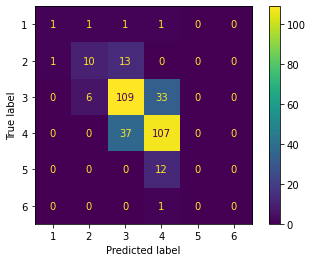

In [103]:
cm = confusion_matrix(test_label, prediction)
cmd = ConfusionMatrixDisplay(cm, display_labels=[1,2,3,4,5,6])
cmd.plot()

**Result**: From the confusion matrix, it can be seen that most of the wrong predicted labels are just bordering the actual true labels, although not the best case scenario, it is still a decent outcome. However, there are 3 values that are outside of bordering the true labels which are the values in row 1 column 3 and 4, and the value in row 6 column 4. It can also been seen that most of the predicted values are for the scores 3 and 4, and fortunately for us, a lot of them seem to be correct or close predictions. However, you can also seen from the confusion matrix that the model did not predict any of the scores for 5 or 6 correctly which is quite the problem.

## Quadratic Weighted Kappa (QWK)
_______________________________________________________________________________________________________________________________

### What is QWK?

The Quadratic Weight Kappa (QWK) is a metric used to measure the agreement between two ratings. These ratings which can range from 0 to 5 are given according to how accurate the predicted data is to the actual data. QWK is calculated between the predicted scores and the actual scores. When calculating QWK, the main goal is to get as close to 1 as possible which is the maximum you can get, but there are also cases where the calculated QWK can fall below 0 and that is when there is less agreement between the ratings than expected. **[14]**

**Explanation**: Here I will be using the sklearn.metrics.cohen_kappa_score function with the parameter 'weights' set to 'Quadratic' to calculate the QWK which has been noted to be the same as QWK by the author in **[14]**. **[15]**

In [104]:
cohen_kappa_score(test_label, prediction, weights='quadratic')

0.6116089652625236

**Result**: Here I received a QWK of 0.6116089652625236 which should be really good score as according to **[14]** a score of 0.6 or more is generally considered really good. 

# Kaggle Submission
_______________________________________________________________________________________________________________________________

## Kaggle Submission Preparation

### Reading the competition data file

In [105]:
sub_data = pd.read_csv('FIT1043-Essay-Features-Submission.csv')

In [106]:
sub_data

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed
0,1623,4332,900,28,13,0,4.813333,39,1,23.076923,893.988852,0.993321,392,0.435556,196,0.217778,750,750
1,1143,1465,280,11,3,1,5.232143,14,3,20.000000,278.321343,0.994005,131,0.467857,51,0.182143,339,316
2,660,1696,325,17,2,0,5.218462,19,1,17.105263,321.316770,0.988667,178,0.547692,92,0.283077,352,337
3,1596,2640,555,20,17,0,4.756757,28,0,19.821429,551.989150,0.994575,228,0.410811,107,0.192793,632,605
4,846,2844,596,33,4,1,4.771812,24,9,24.833333,593.658810,0.996072,279,0.468121,138,0.231544,626,607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,1226,1208,242,8,8,0,4.991736,13,0,18.615385,237.327684,0.980693,135,0.557851,58,0.239669,244,242
195,862,4039,817,24,11,1,4.943696,47,2,17.382979,812.656033,0.994683,386,0.472460,210,0.257038,750,750
196,1562,2448,468,22,7,0,5.230769,22,0,21.272727,465.656652,0.994993,224,0.478632,101,0.215812,540,526
197,1336,1081,214,14,5,0,5.051402,11,0,19.454545,212.990566,0.995283,114,0.532710,63,0.294393,259,256


### Doing the prediction

**Note**: sel_feat = ['chars', 'words', 'commas', 'avg_word_sentence', 'POS', 'prompt_words', 'synonym_words', 'unstemmed', 'stemmed'] from earlier in the assignment

In [107]:
sub_feat = sub_data[sel_feat].values
kag_feat = sc.transform(sub_feat)

In [108]:
kag_pred = svm.predict(kag_feat)

In [109]:
kag_pred

array([4, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 3, 4, 4, 4, 4, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 3, 2, 4, 3, 3, 4, 3, 4, 4, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 4, 4, 3, 3, 4, 4, 4, 3, 4, 3, 3, 4, 4, 2, 3, 3, 4, 3, 3,
       4, 4, 3, 4, 3, 3, 2, 3, 3, 3, 3, 4, 4, 4, 4, 3, 4, 3, 4, 2, 4, 4,
       2, 3, 3, 3, 4, 3, 4, 4, 4, 4, 3, 3, 3, 4, 2, 3, 3, 4, 3, 3, 4, 4,
       4, 3, 4, 4, 4, 3, 3, 4, 2, 3, 4, 4, 4, 3, 2, 4, 3, 4, 3, 2, 4, 4,
       2, 3, 4, 3, 3, 4, 1, 3, 4, 4, 4, 3, 3, 4, 4, 3, 4, 4, 4, 3, 4, 3,
       4, 3, 3, 4, 3, 4, 4, 3, 2, 3, 4, 4, 3, 3, 2, 4, 3, 4, 4, 3, 4, 3,
       4, 3, 3, 4, 4, 3, 4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3,
       3], dtype=int64)

### Reading the provided submission file

In [110]:
kag_sub = pd.read_csv('32713339-OoiYuZhang-29.csv')
kag_sub

,essayid,score
0,1623,4
1,1143,3
2,660,4
3,1596,4
4,846,4
...,...,...
194,1226,3
195,862,4
196,1562,4
197,1336,3


In [111]:
kag_sub['score'] = kag_pred
kag_sub

,essayid,score
0,1623,4
1,1143,3
2,660,4
3,1596,4
4,846,4
...,...,...
194,1226,3
195,862,4
196,1562,4
197,1336,3


### Output to the submission file

In [112]:
kag_sub.to_csv("32713339-OoiYuZhang-29.csv", index=False)

_______________________________________________________________________________________________________________________________

# Conclusion
_______________________________________________________________________________________________________________________________

Through this assignment, I have learnt a lot of new techniques and information, some I have applied in this assignment, and others that I know exist which may or may not be useful to me in the future. What I have learnt are the many different ways of feature selection, feature scaling, what a SVM and QWK are and how they work, and I had the opportunity to participate in my very first Kaggle competition which was quite interesting. Overall, I feel that the model I built could have been better, which is quite apparent when comparing my score to the rest of the leaderboard in the Kaggle competition.

# References

**[1]**  IBM Cloud Education (2020, August 19). What is supervised learning? </br>Retrieved from https://www.ibm.com/cloud/learn/supervised-learning</br>
**[2]**  Amal, Jo. (2021, July 21). What Is Cross-Validation? Comparing Machine Learning Models. </br>Retrieved from https://learn.g2.com/cross-validation</br>
**[3]**  Techopedia (2020, July 1). What is Labeled Data?</br>Retrieved from https://www.techopedia.com/definition/33695/labeled-data</br>
**[4]**  Google Developers (2020, February 10). Training and Test Sets: Splitting Data</br>Retrieved from https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data</br>
**[5]**  Jason, B.(2020, August 28). Feature Selection For Machine Learning in Python</br>Retrieved from https://machinelearningmastery.com/feature-selection-machine-learning-python/M</br>
**[6]**  Pedregosa et al.(2011a).Scikit-learn: Machine Learning in Python</br>Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE</br>
**[7]**  Pedregosa et al.(2011b).Scikit-learn: Machine Learning in Python</br>Retrieved from https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression</br>
**[8]**  Utsav, M.(2021, May 16). Binary and Multiclass Classification in Machine Learning</br>Retrieved from https://www.analyticssteps.com/blogs/binary-and-multiclass-classification-machine-learning</br>
**[9]**  Pedregosa et al.(2011c).Scikit-learn: Machine Learning in Python</br>Retrieved from https://scikit-learn.org/stable/modules/preprocessing.html</br>
**[10]**  Rohith, G.(2018, June 8). Support Vector Machine — Introduction to Machine Learning Algorithms</br>Retrieved from https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47</br>
**[11]**  Tom, S.(2020, March 4). An Introduction to Support Vector Regression (SVR)</br>Retrieved from https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2</br>
**[12]**  Python Geeks.(n.d.). SVM Kernel Function</br>Retrieved from https://pythongeeks.org/svm-kernel-function/</br>
**[13]**  Pedregosa et al.(2011d).Scikit-learn: Machine Learning in Python</br>Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html</br>
**[14]**  Aman, A.(2018, December 30). Quadratic Kappa Metric explained in 5 simple steps</br>Retrieved from https://www.kaggle.com/code/aroraaman/quadratic-kappa-metric-explained-in-5-simple-steps/notebook</br>
**[15]**  Pedregosa et al.(2011e).Scikit-learn: Machine Learning in Python</br>Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html#r219a3b9132e1-1</br>